<a href="https://colab.research.google.com/github/RODIV45/Data-Analysis-with-Python-GFG/blob/main/Baseline2D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
tf.data.experimental.enable_debug_mode()
tf.config.experimental.enable_op_determinism()
tf.config.run_functions_eagerly(True)

In [ ]:
x_train_1=np.load('/content/drive/MyDrive/Finance/x_train_1_data.npy')
x_train_2=np.load('/content/drive/MyDrive/Finance/x_train_2_data.npy')
x_train_3=np.load('/content/drive/MyDrive/Finance/x_train_3_data.npy')
x_train_4=np.load('/content/drive/MyDrive/Finance/x_train_4_data.npy')
x_train_5=np.load('/content/drive/MyDrive/Finance/x_train_5_data.npy')
x_train_6=np.load('/content/drive/MyDrive/Finance/x_train_6_data.npy')
x_train_7=np.load('/content/drive/MyDrive/Finance/x_train_7_data.npy')
x_train_8=np.load('/content/drive/MyDrive/Finance/x_train_8_data.npy')
x_test_1=np.load('/content/drive/MyDrive/Finance/x_test_1_data.npy')
x_test_2=np.load('/content/drive/MyDrive/Finance/x_test_2_data.npy')
x_test_3=np.load('/content/drive/MyDrive/Finance/x_test_3_data.npy')
x_test_4=np.load('/content/drive/MyDrive/Finance/x_test_4_data.npy')
x_test_5=np.load('/content/drive/MyDrive/Finance/x_test_5_data.npy')
x_test_6=np.load('/content/drive/MyDrive/Finance/x_test_6_data.npy')
x_test_7=np.load('/content/drive/MyDrive/Finance/x_test_7_data.npy')
x_test_8=np.load('/content/drive/MyDrive/Finance/x_test_8_data.npy')
y_train_1=np.load('/content/drive/MyDrive/Finance/y_train_1_data.npy')
y_train_2=np.load('/content/drive/MyDrive/Finance/y_train_2_data.npy')
y_test_1=np.load('/content/drive/MyDrive/Finance/y_test_1_data.npy')
y_test_2=np.load('/content/drive/MyDrive/Finance/y_test_2_data.npy')

In [ ]:
import numpy as np

# Your concatenated array
concatenated_test_1 = np.concatenate((x_test_1, x_test_2, x_test_3, x_test_4), axis=2)
concatenated_test_2 = np.concatenate((x_test_5, x_test_6, x_test_7, x_test_8), axis=2)


# Reshape the array
reshaped_array_test_1 = concatenated_test_1.reshape(30000,39, 4)
reshaped_array_test_2 = concatenated_test_2.reshape(30000,39, 4)

In [ ]:
# Assuming you have x_train_1 with shape (11000, 39, 4) and x_train_2 with shape (11000, 39, 4)
# Stack the two arrays along a new second axis (axis=1)
merged_data_test = np.stack((reshaped_array_test_1, reshaped_array_test_2), axis=1)

# Print the shape of the merged data to confirm it's (11000, 2, 39, 4)
print(merged_data_test.shape)

(30000, 2, 39, 4)


In [ ]:
import numpy as np

# Your concatenated array
concatenated_1 = np.concatenate((x_train_1, x_train_2, x_train_3, x_train_4), axis=2)
concatenated_2 = np.concatenate((x_train_5, x_train_6, x_train_7, x_train_8), axis=2)


# Reshape the array
reshaped_array_1 = concatenated_1.reshape(111635,39, 4)
reshaped_array_2 = concatenated_2.reshape(111635,39, 4)

print(reshaped_array_1.shape)  # Should print (39, 4, 2, 111635)

(111635, 39, 4)


In [ ]:
# Assuming you have x_train_1 with shape (11000, 39, 4) and x_train_2 with shape (11000, 39, 4)
# Stack the two arrays along a new second axis (axis=1)
merged_data = np.stack((reshaped_array_1, reshaped_array_2), axis=1)

# Print the shape of the merged data to confirm it's (11000, 2, 39, 4)
print(merged_data.shape)

(111635, 2, 39, 4)


In [ ]:
np.random.permutation(merged_data)
np.random.permutation(merged_data_test)
np.random.permutation(y_train_1)
np.random.permutation(y_train_2)
np.random.permutation(y_test_1)
np.random.permutation(y_test_2)

array([100.65416518, 350.14019978,  50.09834361, ...,  50.        ,
       250.28255802, 250.26648435])

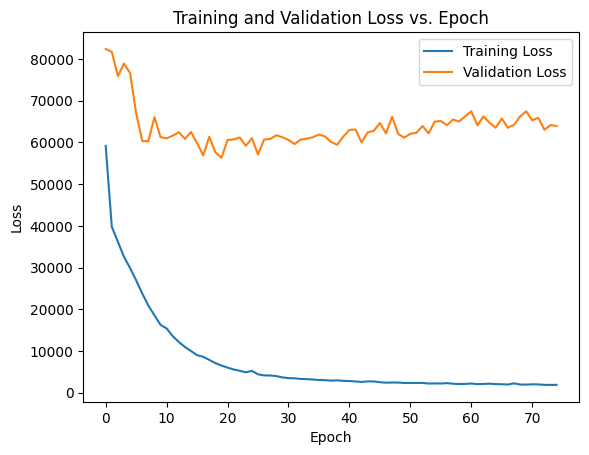

In [ ]:
#Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()  # Add a legend to differentiate between Training Loss and Validation Loss
plt.show()

In [ ]:
#predictions = model.predict([concatenated_TestAmp[1],concatenated_TestP[1]])

predictions = model.predict([merged_data_test])

# Extract predictions for out1 and out2
predicted_out1 = predictions[0].flatten()  # Convert to 1D array
predicted_out2 = predictions[1].flatten()

938/938 [==============================] - 19s 21ms/step


In [ ]:
# ALE Average Localisation error


errors_out1 = np.square(predicted_out1 - y_test_1)
errors_out2 = np.square(predicted_out2 - y_test_2)

errors = np.add(errors_out1,errors_out2)
errors = np.sqrt(errors)
errors = np.mean(errors)
print(errors)

43.09171104630409


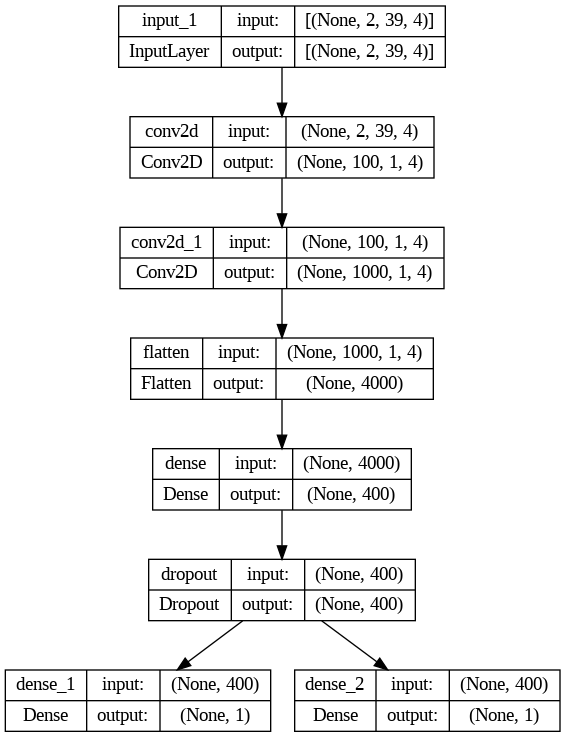

In [ ]:
#2D CNN Model
from keras.utils import plot_model

# Visualize the model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import median_absolute_error
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import RMSprop, Adamax
from tensorflow.keras.optimizers import Adam, Adagrad
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np
#2D CNN Model
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adamax
from tensorflow.keras.optimizers import Adam, Adagrad
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import LeakyReLU

l2_reg = 0.001
random_seed = 42
tf.random.set_seed(random_seed)
np.random.seed(random_seed)
keras.utils.set_random_seed(42)

from tensorflow.keras.initializers import GlorotUniform

initializer = GlorotUniform(random_seed)


# Input layer
input_layer = Input(shape=(2, 39, 4))

# Convolutional Layer 1
conv1 = Conv2D(
    100,
    kernel_size=(39, 1),
    activation='relu',
    padding='valid',
    strides=(1, 1),
    data_format='channels_first',
    kernel_regularizer=l2(1e-3)  # Weight decay
)(input_layer)

# Convolutional Layer 2
conv2 = Conv2D(
    1000,
    kernel_size=(1, 1),
    activation='relu',
    padding='valid',
    strides=(1, 1),
    data_format='channels_first',
    kernel_regularizer=l2(1e-3)  # Weight decay
)(conv1)

# Flatten layer
flatten = Flatten()(conv2)

# Fully Connected Layer 1
fc1 = Dense(400, activation='relu', kernel_regularizer=l2(1e-3), kernel_initializer=initializer)(flatten)

# Dropout Layer
dropout = Dropout(0.5)(fc1)

# Fully Connected Layer 2 for x prediction
x_output = Dense(1)(dropout)

# Fully Connected Layer 3 for y prediction
y_output = Dense(1)(dropout)

# Create the model
model = Model(inputs=input_layer, outputs=[x_output, y_output])

# Define learning rate scheduler callback
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.5,           # Reduce learning rate by half
    patience=3,           # Number of epochs with no improvement to wait before adjusting learning rate
    min_lr=1e-6,          # Minimum learning rate
    verbose=1             # Print messages
)

# Define a custom Median Absolute Error metric function
def median_absolute_error(y_true, y_pred):
    return np.median(np.abs(y_true - y_pred))


# ... (previous code)
opt = Adam(learning_rate=0.001)
model.compile(loss=MeanSquaredError(), optimizer=opt, metrics=[MeanAbsoluteError(),median_absolute_error])
# Print a summary of the model architecture
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 39, 4)]   0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 100, 1, 4)    7900        ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 1000, 1, 4)   101000      ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 4000)         0           ['conv2d_1[0][0]']               
                                                                                              

In [ ]:
# Train the model
history = model.fit(merged_data, [y_train_1, y_train_2], batch_size=4000, epochs=75, validation_split=0.1)

Epoch 1/75
26/26 [==============================] - 13s 146ms/step - loss: 59485.4844 - dense_1_loss: 41162.5039 - dense_2_loss: 18322.0488 - dense_1_mean_absolute_error: 164.1936 - dense_1_median_absolute_error: 151.0637 - dense_2_mean_absolute_error: 111.1561 - dense_2_median_absolute_error: 104.4915 - val_loss: 81331.7812 - val_dense_1_loss: 29176.9316 - val_dense_2_loss: 52153.9219 - val_dense_1_mean_absolute_error: 149.1842 - val_dense_1_median_absolute_error: 153.8912 - val_dense_2_mean_absolute_error: 225.3816 - val_dense_2_median_absolute_error: 228.2947
Epoch 2/75
26/26 [==============================] - 3s 108ms/step - loss: 39596.1875 - dense_1_loss: 26497.1445 - dense_2_loss: 13098.0928 - dense_1_mean_absolute_error: 134.4222 - dense_1_median_absolute_error: 121.9535 - dense_2_mean_absolute_error: 97.2226 - dense_2_median_absolute_error: 92.2839 - val_loss: 82550.2656 - val_dense_1_loss: 29461.1875 - val_dense_2_loss: 53088.1094 - val_dense_1_mean_absolute_error: 148.9996 -